In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

In [72]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [73]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size = 0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.1, random_state=42)

In [74]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_valid_norm = sc.transform(X_valid)
X_test_norm = sc.transform(X_test)


In [75]:
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

#Sequential Neural Network for Regression

In [76]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50,activation = 'relu', input_shape = [8]))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'relu'))


In [77]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])

In [79]:
model_history = model.fit(X_train_norm, y_train, epochs=40, validation_data=(X_valid_norm, y_valid))

Epoch 1/40
523/523 [==============================] - 1s 2ms/step - loss: 5.5815 - mae: 2.0643 - val_loss: 5.4701 - val_mae: 2.0442
Epoch 2/40
523/523 [==============================] - 1s 1ms/step - loss: 5.6001 - mae: 2.0652 - val_loss: 5.4661 - val_mae: 2.0431
Epoch 3/40
523/523 [==============================] - 1s 1ms/step - loss: 4.7665 - mae: 1.8399 - val_loss: 1.0533 - val_mae: 0.7433
Epoch 4/40
523/523 [==============================] - 1s 1ms/step - loss: 0.8965 - mae: 0.6956 - val_loss: 0.7321 - val_mae: 0.6436
Epoch 5/40
523/523 [==============================] - 1s 1ms/step - loss: 0.6945 - mae: 0.6356 - val_loss: 0.6892 - val_mae: 0.6069
Epoch 6/40
523/523 [==============================] - 1s 1ms/step - loss: 0.6343 - mae: 0.5976 - val_loss: 0.6626 - val_mae: 0.5907
Epoch 7/40
523/523 [==============================] - 1s 1ms/step - loss: 0.6073 - mae: 0.5769 - val_loss: 0.6394 - val_mae: 0.5772
Epoch 8/40
523/523 [==============================] - 1s 1ms/step - loss: 0.

In [80]:
mae_test = model.evaluate(X_test_norm, y_test)

65/65 [==============================] - 0s 1ms/step - loss: 0.4197 - mae: 0.4563


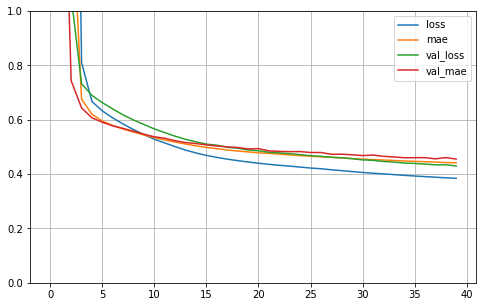

In [81]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [82]:
X_test_norm.shape

(2064, 8)

In [83]:
r = np.random.randint(1,2064, size = 3)
r

array([1973, 1006,  199])

In [84]:
X_new = X_test_norm[r]
Y_new = y_test[r]

In [ ]:
y_pred = model.predict(X_new)
print (y_pred)
print(Y_new)